In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/content/Student_Performance.csv')
print(df.head())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [8]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None
       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.

In [10]:
# Пример: если у вас есть категориальный столбец 'Category'
df = pd.get_dummies(df, columns=['Extracurricular Activities'], drop_first=True)

Корреляция Пирсона:
                                   Hours Studied  Previous Scores  Sleep Hours  \
Hours Studied                          1.000000        -0.012390     0.001245   
Previous Scores                       -0.012390         1.000000     0.005944   
Sleep Hours                            0.001245         0.005944     1.000000   
Sample Question Papers Practiced       0.017463         0.007888     0.003990   
Performance Index                      0.373730         0.915189     0.048106   
Extracurricular Activities_Yes         0.003873         0.008369    -0.023284   

                                  Sample Question Papers Practiced  \
Hours Studied                                             0.017463   
Previous Scores                                           0.007888   
Sleep Hours                                               0.003990   
Sample Question Papers Practiced                          1.000000   
Performance Index                                         0.0

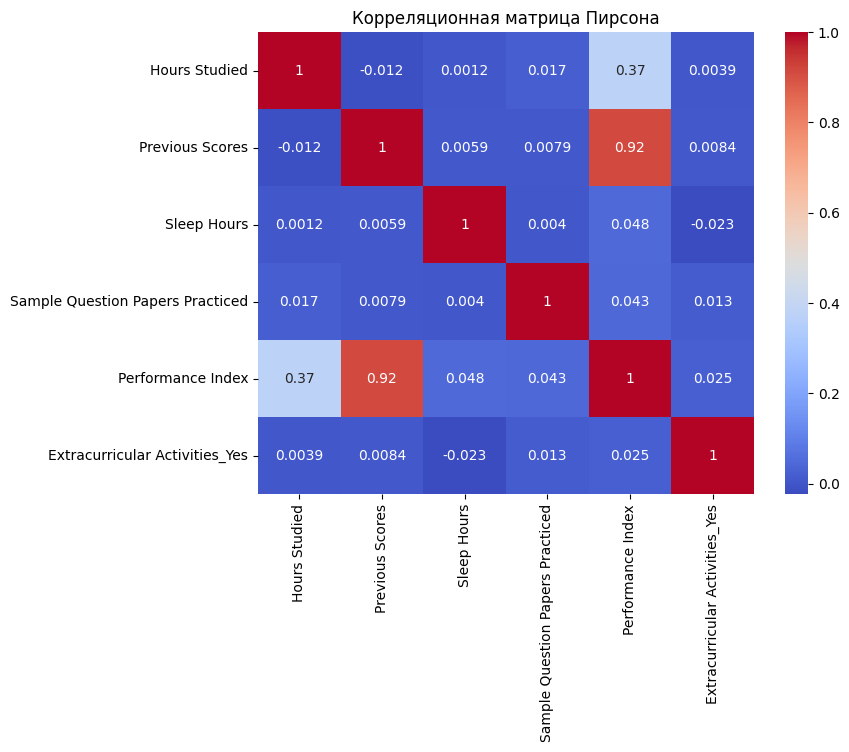

In [12]:
import seaborn as sns
pearson_corr = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')
print("Корреляция Пирсона:\n", pearson_corr)
print("\nКорреляция Спирмена:\n", spearman_corr)
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')
plt.title("Корреляционная матрица Пирсона")
plt.show()

In [24]:
# Построение модели с statsmodels
X = df[['Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']]
Y = df['Performance Index']
# Добавляем константу в матрицу признаков
X = sm.add_constant(X)
# Строим модель
model_sm = sm.OLS(Y, X).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                 1.758e+04
Date:                Thu, 24 Apr 2025   Prob (F-statistic):               0.00
Time:                        09:20:11   Log-Likelihood:                -34560.
No. Observations:               10000   AIC:                         6.913e+04
Df Residuals:                    9996   BIC:                         6.916e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [25]:
# Построение модели с sklearn
model_sk = LinearRegression()
model_sk.fit(X, Y)

# Коэффициенты
print("Intercept:", model_sk.intercept_)
print("Coefficients:", model_sk.coef_)

# Предсказание
y_pred = model_sk.predict(X)

Intercept: -19.38887325845836
Coefficients: [0.         1.01324311 0.4817774  0.24043828]


In [26]:
# Расчёт метрик качества
r2 = r2_score(Y, y_pred)
mse = mean_squared_error(Y, y_pred)

print("R^2:", r2)
print("MSE:", mse)

R^2: 0.8406791439923564
MSE: 58.80301221740631


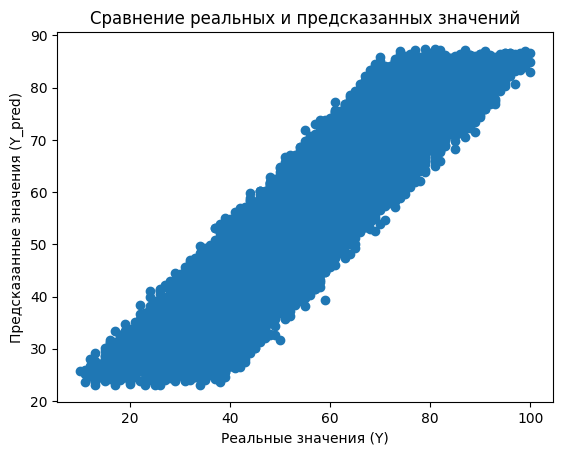

In [27]:
# График «предсказанные vs. реальные значения»
plt.scatter(Y, y_pred)
plt.xlabel("Реальные значения (Y)")
plt.ylabel("Предсказанные значения (Y_pred)")
plt.title("Сравнение реальных и предсказанных значений")
plt.show()

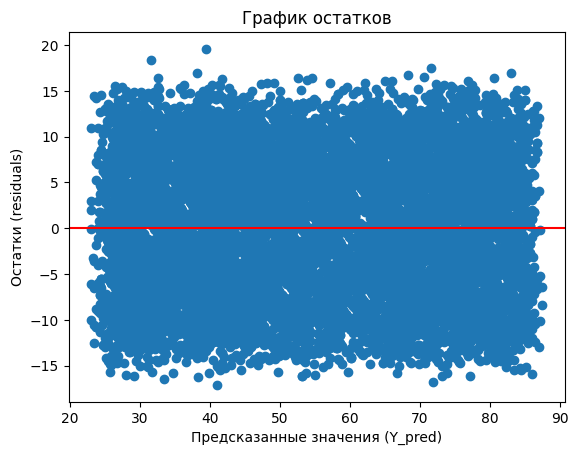

In [28]:
# График остатков
residuals = Y - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Предсказанные значения (Y_pred)")
plt.ylabel("Остатки (residuals)")
plt.title("График остатков")
plt.axhline(y=0, color='red')
plt.show()